# Gender classification

**G Henry Jacob**

31st May 2021

### Introdution

Gender classsification data set contains details of gender(forehead width, forehead height, long hair, etc.) and the target variable is **gender**

##### Data can be found at <code>[here](https://www.kaggle.com/elakiricoder/gender-classification-dataset)<code>

![](https://miro.medium.com/max/4320/1*8-1QrV3nlRjTFlDRJs2swg.jpeg)

### Methodology

We will be creating our model with the help of Python so we start off by importing all the required packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Collecting data

In [2]:
#read data usnig pandas
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


### Analysing Data

Analyze the gender data and extract the information from it

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 293.1+ KB


In [4]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(5001, 8)

In [6]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [7]:
col = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']

In [8]:
# to see each column and their value_counts
for i in col:
    val_count = df[i].value_counts()
    print(f'Column :{i}')
    print(f'{val_count.index[0]} ---> {val_count.values[0]}')
    print(f'{val_count.index[1]} ---> {val_count.values[1]}')

Column :long_hair
1 ---> 4349
0 ---> 652
Column :nose_wide
0 ---> 2531
1 ---> 2470
Column :nose_long
1 ---> 2540
0 ---> 2461
Column :lips_thin
0 ---> 2535
1 ---> 2466
Column :distance_nose_to_lip_long
0 ---> 2506
1 ---> 2495
Column :gender
Female ---> 2501
Male ---> 2500


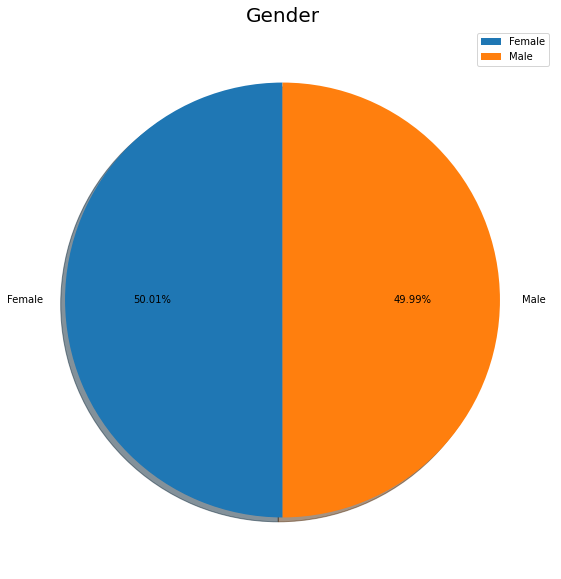

In [9]:
# to plot gender in pie chart
gender = df.gender.value_counts()
plt.figure(figsize = (10, 10))
plt.pie(gender.values, labels=gender.index, autopct='%.2f%%', shadow=True, startangle=90)
plt.title('Gender', fontsize=20)
plt.legend()
plt.show()

In [10]:
male_long_hair = df[df['gender'] == 'Male']['long_hair'].sum()
female_long_hair = df[df['gender'] == 'Female']['long_hair'].sum()

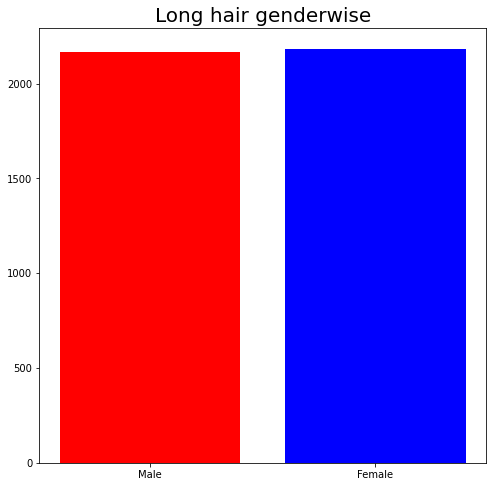

In [11]:
# to see long hair genderwise in barplot
color = ['red', 'blue']
plt.figure(figsize = (8, 8))
plt.bar(x = ['Male', 'Female'], height = [male_long_hair, female_long_hair], color = color)
plt.title('Long hair genderwise', fontsize = 20)
plt.show()

It looks both gender are almost same in number who have long hair

In [12]:
print(f'{male_long_hair} male have long hair and {female_long_hair} female have long hair')

2165 male have long hair and 2184 female have long hair


In [13]:
male_df = df[df['gender'] == 'Male']
female_df = df[df['gender'] == 'Female']

In [14]:
# to see male and female who have long hair in percentage 
print(f'{(male_long_hair * 100) / male_df.shape[0]}% of female have long hair')
print(f'{(female_long_hair * 100) / female_df.shape[0]}% of male have long hair')

86.6% of female have long hair
87.32506997201119% of male have long hair


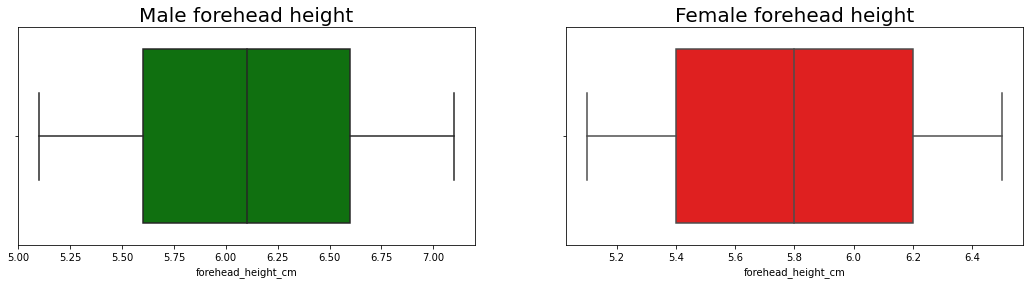

In [15]:
# to plot male forehead height
plt.figure(figsize=(18,4));
plt.subplot(121)
sns.boxplot(male_df['forehead_height_cm'], color = 'green')
plt.title('Male forehead height', size = 20);

# to plot female forehead height
ax2 = plt.subplot(122)
sns.boxplot(female_df['forehead_height_cm'], color = 'red')
plt.title('Female forehead height', size = 20);

Male forehead height is higher than female, Male forehead height is more than 7cm wheras female has 6.5cm

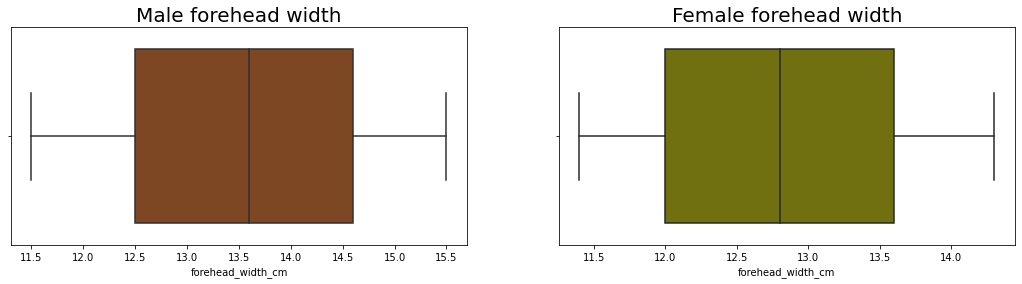

In [16]:
# to plot male forehead width
plt.figure(figsize=(18,4));
plt.subplot(121)
sns.boxplot(male_df['forehead_width_cm'], color = 'saddlebrown')
plt.title('Male forehead width', size = 20);

# to plot female forehead width
ax2 = plt.subplot(122)
sns.boxplot(female_df['forehead_width_cm'], color = 'olive')
plt.title('Female forehead width', size = 20);

Male forehead width is range from 11.5cm to 15.5cm whereas female has 11.3cm to 14.3cm

In [17]:
male_nose_wide = male_df['nose_wide'].sum()
female_nose_wide = female_df['nose_wide'].sum()

In [18]:
male_nose_long = male_df['nose_long'].sum()
female_nose_long = female_df['nose_long'].sum()

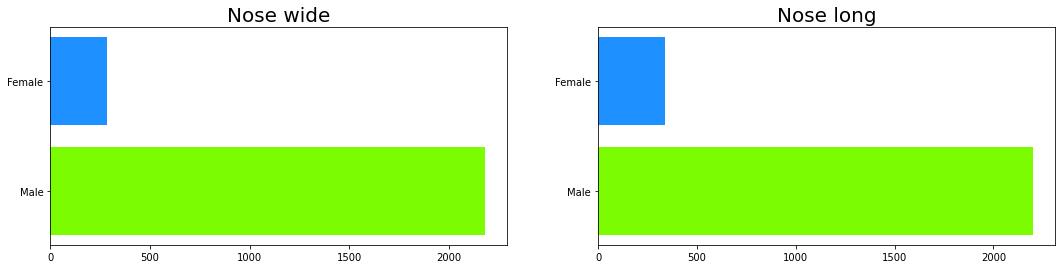

In [19]:
color = ['lawngreen', 'dodgerblue']
# to plot male nose wide
plt.figure(figsize=(18,4));
plt.subplot(121)
plt.barh(y = ['Male', 'Female'], width = [male_nose_wide, female_nose_wide], color = color)
plt.title('Nose wide', size = 20);

# to plot female nose long
ax2 = plt.subplot(122)
plt.barh(y = ['Male', 'Female'], width = [male_nose_long, female_nose_long], color = color)
plt.title('Nose long', size = 20);

Male and female are have high differnce in their nose size. 
Male have wide and long nose than female

In [20]:
male_nose_long_0 = male_df.shape[0] - male_nose_long
female_nose_long_0 = female_df.shape[0] - female_nose_long

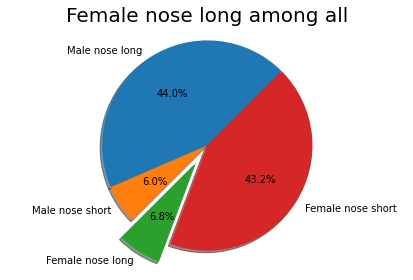

In [21]:
# to plot pie chart(data of female who have long nose with rest of the data)
labels = ['Male nose long', 'Male nose short', 'Female nose long', 'Female nose short']
sizes = [male_nose_long, male_nose_long_0, female_nose_long, female_nose_long_0]
# only "explode" the 3rd slice (i.e. 'Female nose long')
explode = (0, 0, 0.2, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax1.set_title('Female nose long among all', size = 20)
plt.tight_layout()
plt.show()

6.8% of female have long nose when compare to female who don't have long nose and male data

In [22]:
male_nose_wide_0 = male_df.shape[0] - male_nose_wide
female_nose_wide_0 = female_df.shape[0] - female_nose_wide

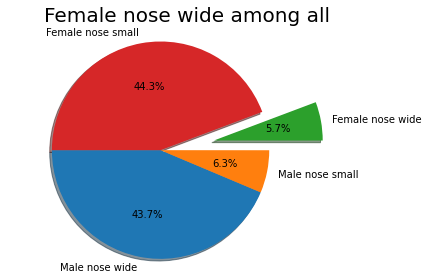

In [23]:
# to plot pie chart
labels = ['Male nose wide', 'Male nose small', 'Female nose wide', 'Female nose small']
sizes = [male_nose_wide, male_nose_wide_0, female_nose_wide, female_nose_wide_0]
# only "explode" the 3rd slice (i.e. 'Female nose wide')
explode = (0, 0, 0.5, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax1.set_title('Female nose wide among all', size = 20)
plt.tight_layout()
plt.show()

above comparision shows female who have wide nose is 5.7% among all

In [24]:
male_lips_thin = male_df['lips_thin'].sum()
female_lips_thin = female_df['lips_thin'].sum()

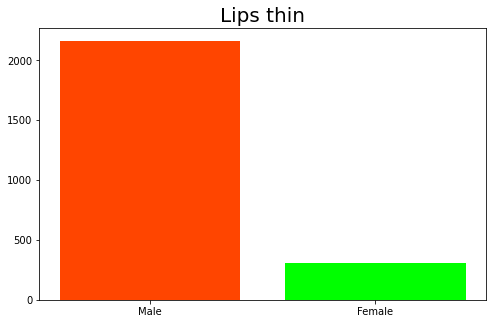

In [25]:
# to plot barplot(thin lips)
color = ['orangered', 'lime']
plt.figure(figsize = (8, 5))
plt.bar(x = ['Male', 'Female'], height=[male_lips_thin, female_lips_thin], color = color)
plt.title('Lips thin', size = 20)
plt.show()

More male have thin lips than female

In [26]:
male_dist_nose_to_lip = male_df['distance_nose_to_lip_long'].sum()

In [27]:
female_dist_nose_to_lip = female_df['distance_nose_to_lip_long'].sum()

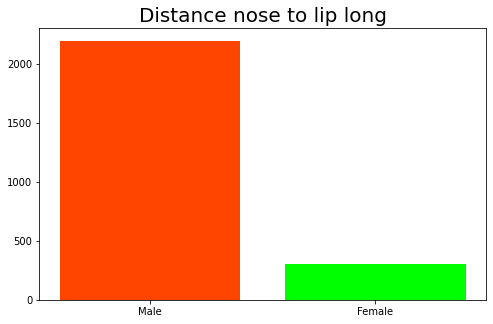

In [28]:
# to plot barplot
plt.figure(figsize = (8, 5))
plt.bar(['Male', 'Female'], [male_dist_nose_to_lip, female_dist_nose_to_lip], color = color)
plt.title('Distance nose to lip long', size = 20)
plt.show()

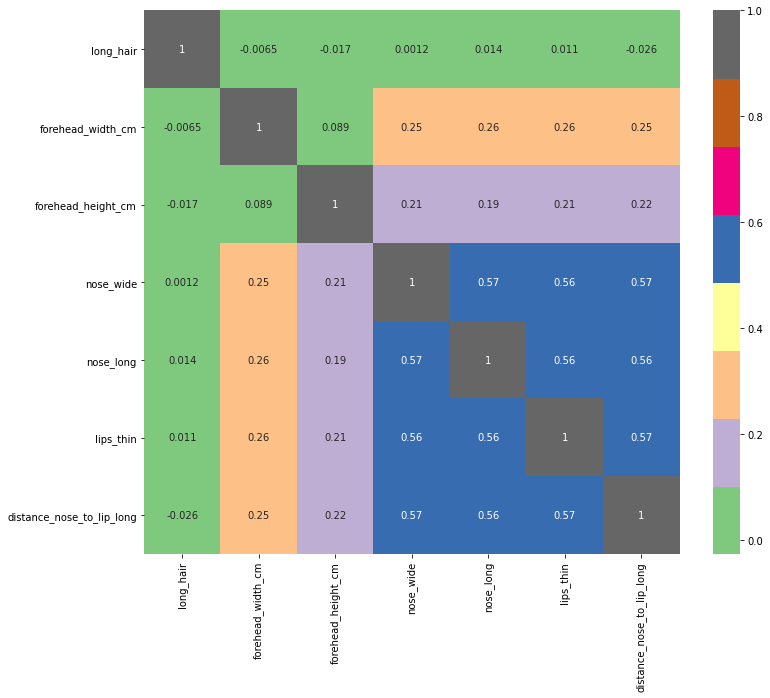

In [29]:
# to see correlation between data
corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot= True, cmap=plt.cm.Accent)
plt.show()

There is no high correlation between two features

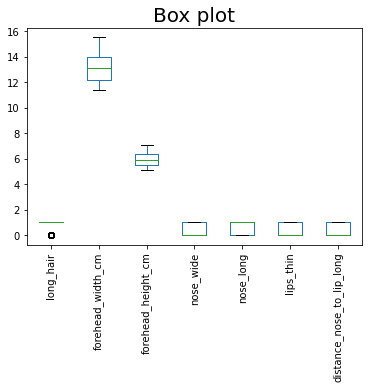

In [30]:
# to see all data in a boxplot
df.plot(kind = 'box')
plt.title('Box plot', size = 20)
plt.xticks(rotation = 90)
plt.show()

There is no outlier present in the data

In [31]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

data is balance

### Data Wrangling

In [32]:
# to see null values
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

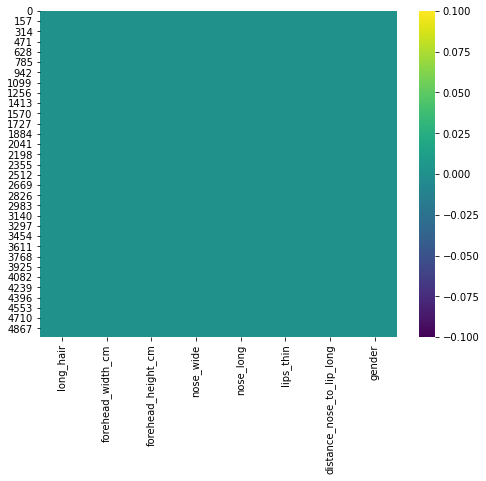

In [33]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

There is no null values in the data set

### One-hot encoding

In [34]:
# to see data types
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [35]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
# replace the string values with numerical values
df['gender'] = df['gender'].replace({
    'Male':1,
    'Female':0
})

In [37]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


data is encoded with numerical values

In [38]:
df['gender'].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

Dataset has equal number of data on both classes, thus balanced dataset

### Train

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(['gender'], axis = 1).copy()
y = df['gender'].copy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_model = LogisticRegression().fit(X_train, y_train)

### Test

In [44]:
pred = log_model.predict(X_test)

In [45]:
pred_df = pd.DataFrame({'y_test':y_test, 'Predicted':pred})
pred_df

,y_test,Predicted
2452,0,0
3858,1,1
655,0,0
101,1,1
3462,1,1
...,...,...
1331,0,0
3577,1,1
3642,1,1
291,0,0


### Accuracy

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [47]:
print(confusion_matrix(y_test, pred))

[[722  29]
 [ 27 723]]


In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       751
           1       0.96      0.96      0.96       750

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [49]:
# to generate roc curve
def generate_roc_curve(model, X_test):
    plt.figure(figsize = (10, 7))
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color = 'red', label = 'ROC Score :'+ str(roc_score))
    plt.title('ROC Curve', size = 15)
    plt.legend(loc = 4)
    plt.show()

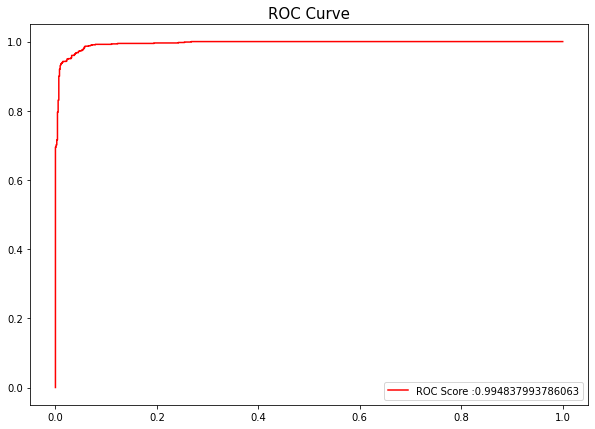

In [50]:
generate_roc_curve(log_model, X_test)

In [51]:
print(f'Accuracy score is :{accuracy_score(y_test, pred) * 100}')

Accuracy score is :96.26915389740172


### Results

More number of both genders have long hair

86.6% of female have long hair

87.3% of male have long hair

Range of few male forehead height is higher than female forehead

Male forehead width has the same too

There is a huge difference between Male and Female nose

Male have wide and long nose whereas female have small and short nose

More Male have thin lips than Female

More Male have long distance between nose to lip whereas
few Female have long distance between nose to lip
